In [1]:
import time
import pandas as pd
import numpy as np
import util
import pyBigWig
import seaborn as sns
import glob
from matplotlib_venn import venn2,venn3
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
tic=time.time()

In [5]:
h=pd.read_csv('data/h.csv',index_col=0)
len(h)

39517

   ezg T cell     value
0  Low     ty  0.003165


[Text(0.5, 0, 'EZH Binding Level'), Text(0, 0.5, 'DNA Methylation')]

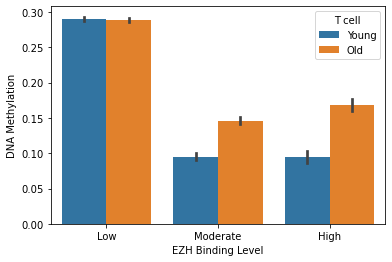

In [6]:
for n in ['y','o']:
    path='data/meth/t/'+n+'.bw'
    bw=pyBigWig.open(path)
    h[s+n]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
h[s+'d']=h[s+'o']-h[s+'y']
pl=h[['ezg','ty','to']].melt('ezg')
pl.columns=['ezg','T cell','value']
print(pl.head(1))
pl['T cell']=pl['T cell'].replace({'ty':'Young','to':'Old'})
ax=sns.barplot(data=pl,x='ezg',y='value',hue='T cell')
ax.set(xlabel='EZH Binding Level', ylabel='DNA Methylation')

[Text(0, 0.5, 'DNA Methylation')]

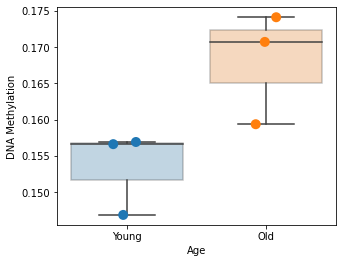

In [11]:
fyo=['Young-381','Young-400','Young-498','Old-247','Old-602','Old-725']
for sn in fyo:
    path='data/meth/f/yo/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
hz=h[h.ezg=='High']
p=pd.DataFrame(hz[fyo].mean())
p['Age']=3*['Young']+3*['Old']
#p.columns=['Average DNAm','Passage']#,'Condition','Individual']
fig, ax = plt.subplots(figsize=(5,4))
ax=sns.boxplot(data=p,x='Age',y=0,boxprops=dict(alpha=.3))
ax=sns.stripplot(data=p,x='Age',y=0,marker=".",size=20)
ax.set( ylabel='DNA Methylation')

In [ ]:
fs=['SRR3264'+str(i) for i in [413,414,415,416,722]]
for sn in fs:
    path='data/meth/f/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
p=pd.DataFrame(hz[fs].mean())
p['Passage']=[4,7,10,31,33]
p.columns=['Average DNAm','Passage']#,'Condition','Individual']
fig, ax = plt.subplots(figsize=(5,4))
ax=sns.regplot(data=p,x='Passage',y='Average DNAm',label='R-squared = 0.99991')
ax.legend(loc="best")    
print(p.corr())

In [ ]:
sp=['SRR10429'+ i for i in  ['03','06','07','09','11','13']]
se=['SRR10429'+ i for i in  ['04','05','08','10','12','14']]
sep=sp+se
for sn in sep:
    path='data/meth/s/'+sn+'.bw'
    bw=pyBigWig.open(path)
    h[sn]=h.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean',exact=True)[0],axis=1)
p=pd.DataFrame(hz[sep].mean())
p['age']=[25,23,18,75,74,83]+[25,23,18,75,74,83]
p['g']= ['Sun-protected']*6+['Sun-exposed']*6
p['indivudal']=2*['Young1','Young2','Young3','Old1','Old2','Old3']
p.columns=['Average DNAm','Age','Condition','Individual']
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(data=p,x='Age',y='Average DNAm',hue='Condition',hue_order=['Sun-exposed','Sun-protected'],
                palette=['red','green'],markers=True, style='Individual',s=100,alpha=.7)